In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from MultiTrain import MultiClassifier

rect = pd.read_csv("gs://preisler_tfdata/preisler-tensors-rectangular.csv")
rect.drop(labels=["system:index", ".geo"], inplace=True, axis=1)
rect.head()

,fire,latitude,longitude,near,pct_mortality,prcp1,prcp2,prcp3,prcp4,rhost,winter_tmin,year
0,0.0,39.364372,-120.643743,0.0,0.0,2165.096253,2625.065732,2528.197322,2350.336264,0.997197,-9.364091,2000
1,0.0,38.357131,-120.284417,0.0,0.0,1313.865375,2099.670087,1540.242359,1516.318232,1.000000,-7.670080,2000
2,0.0,37.961582,-119.565764,0.0,0.0,826.657742,1415.066463,1230.405996,1064.524727,0.917275,-12.647418,2000
3,0.0,40.766764,-121.003069,0.0,0.0,776.796833,1317.913046,939.542740,998.941222,0.991734,-14.273738,2000
4,0.0,39.558565,-120.176619,0.0,0.0,815.862638,1034.520669,1020.311838,1014.091595,1.000000,-13.128885,2000


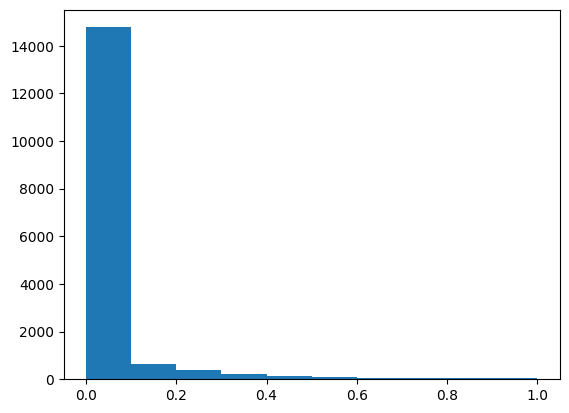

In [2]:
plt.hist(rect["pct_mortality"])
plt.show()

In [3]:
n_mort = np.sum(rect["pct_mortality"] > 0)
print("Pixels with mortality:", n_mort)
print("Pixels with no mortality:", rect.shape[0] - n_mort)

Pixels with mortality: 5573
Pixels with no mortality: 10855


In [4]:
train = MultiClassifier(
    verbose=True,
    select_models=[m for m in MultiClassifier().classifier_model_names() if m != "RidgeClassifier"]
)

features = rect.drop("pct_mortality", axis=1)
labels = rect["pct_mortality"] > 0
scaler = StandardScaler()
features_scale = scaler.fit_transform(features)

In [5]:
split = train.split(X=features_scale, 
                    y=labels, 
                    sizeOfTest=0.3, 
                    randomState=42,
                    strat=True,
                    shuffle_data=True)

In [6]:
fit = train.fit(splitting=True,
                split_data=split)

INFO:MultiTrain.classification.classification_models:It is advisable to set cores in the MultiClassifier object to -1 to use all cores in the cpu, this reduces training time significantly


Training in progress:   0%           ? [0/27 ]

ERROR:MultiTrain.classification.classification_models:BernoulliNB unable to fit properly
ERROR:MultiTrain.classification.classification_models:MultinomialNB unable to fit properly


,Overfitting,Accuracy,Balanced Accuracy,ROC AUC,f1 score,Precision,Recall,execution time(seconds)
LogisticRegression,False,0.723676,0.643492,0.643492,0.491791,0.653770,0.394139,0.020000
LogisticRegressionCV,False,0.723676,0.643492,0.643492,0.491791,0.653770,0.394139,0.290000
SGDClassifier,False,0.711909,0.609849,0.609849,0.407840,0.673554,0.292464,0.030000
PassiveAggressiveClassifier,False,0.632988,0.616492,0.616492,0.510949,0.466206,0.565191,0.010000
RandomForestClassifier,True,0.812944,0.777109,0.777109,0.707116,0.754065,0.665670,1.470000
GradientBoostingClassifier,False,0.802597,0.772627,0.772627,0.700154,0.722187,0.679426,1.900000
HistGradientBoostingClassifier,False,0.817813,0.789816,0.789816,0.723522,0.745558,0.702751,0.580000
AdaBoostClassifier,False,0.780483,0.750363,0.750363,0.669921,0.683686,0.656699,0.510000
CatBoostClassifier,False,0.827551,0.802860,0.802860,0.740696,0.755915,0.726077,5.440000
XGBClassifier,True,0.832217,0.807264,0.807264,0.746863,0.764890,0.729665,1.720000


<AxesSubplot:title={'center':'ACCURACY'}, xlabel='model_names', ylabel='Accuracy'>

<AxesSubplot:title={'center':'ROC AUC'}, xlabel='model_names', ylabel='ROC AUC'>

<AxesSubplot:title={'center':'F1 SCORE'}, xlabel='model_names', ylabel='f1 score'>

<AxesSubplot:title={'center':'PRECISION'}, xlabel='model_names', ylabel='Precision'>

<AxesSubplot:title={'center':'RECALL'}, xlabel='model_names', ylabel='Recall'>

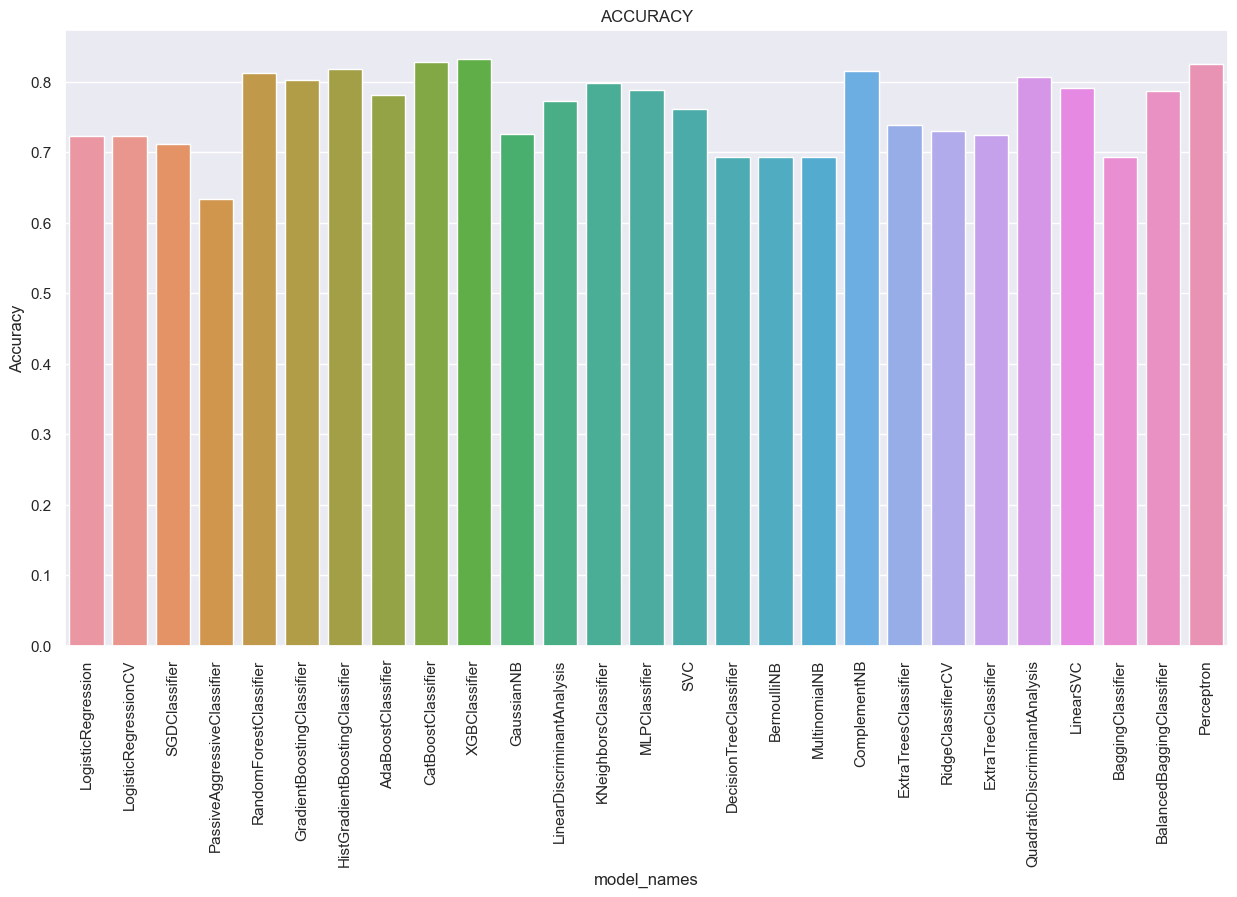

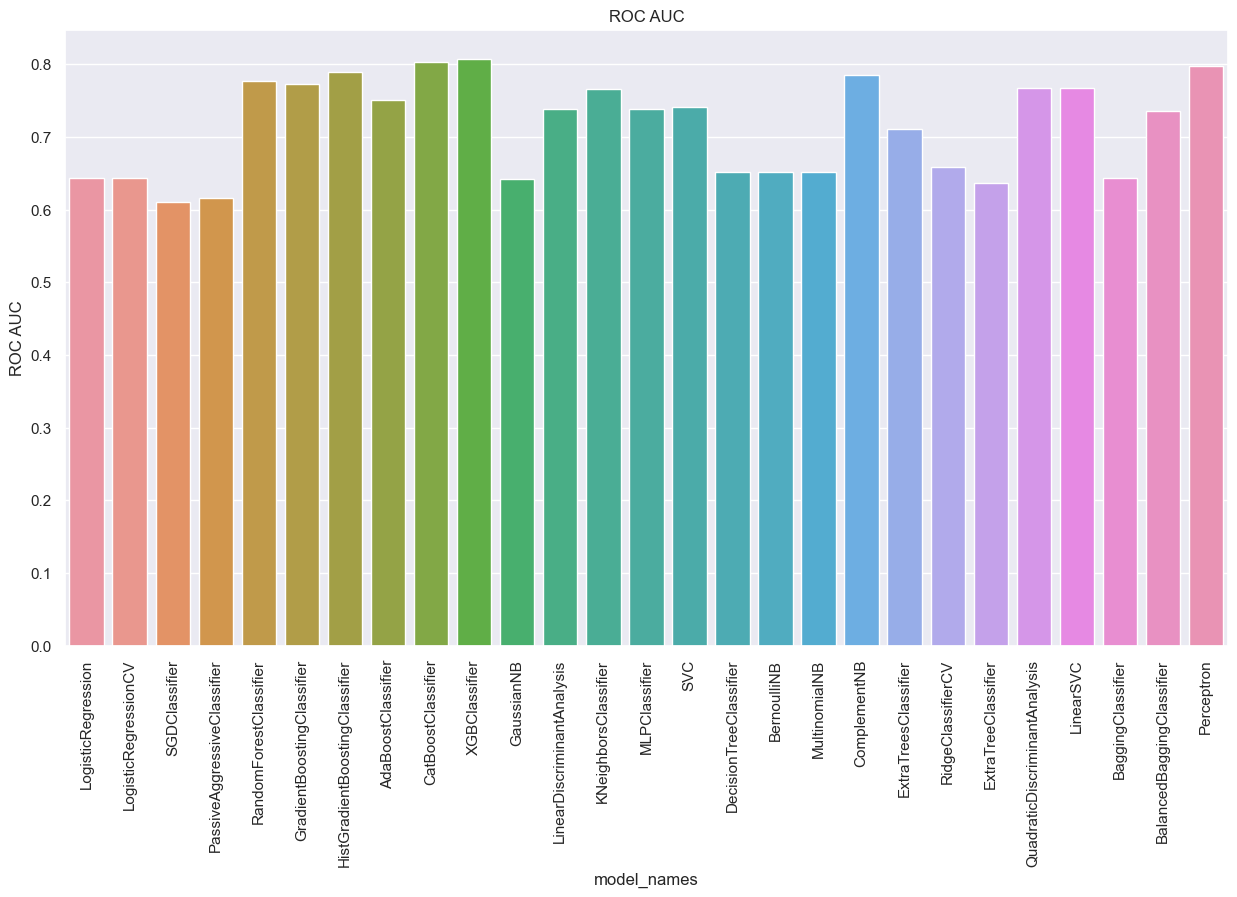

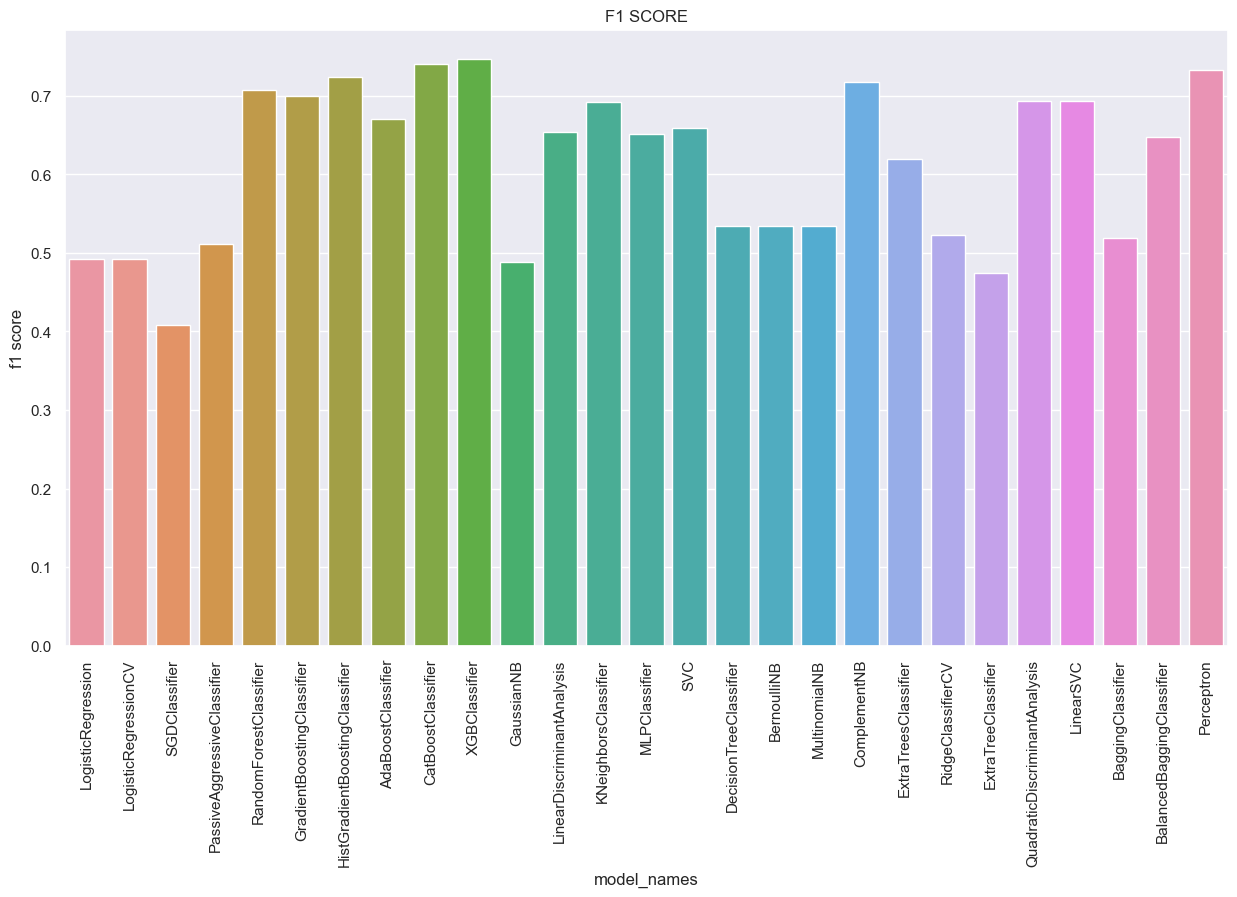

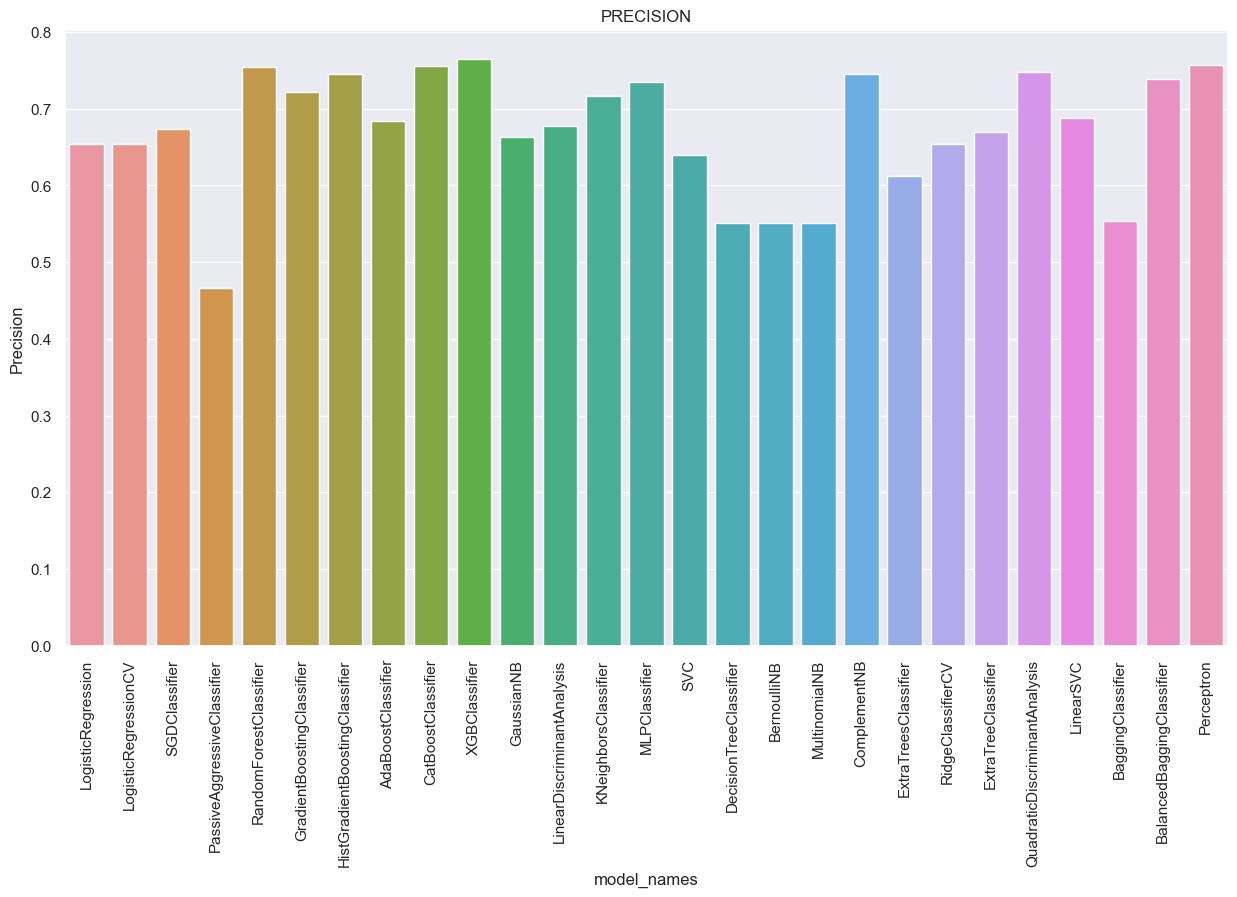

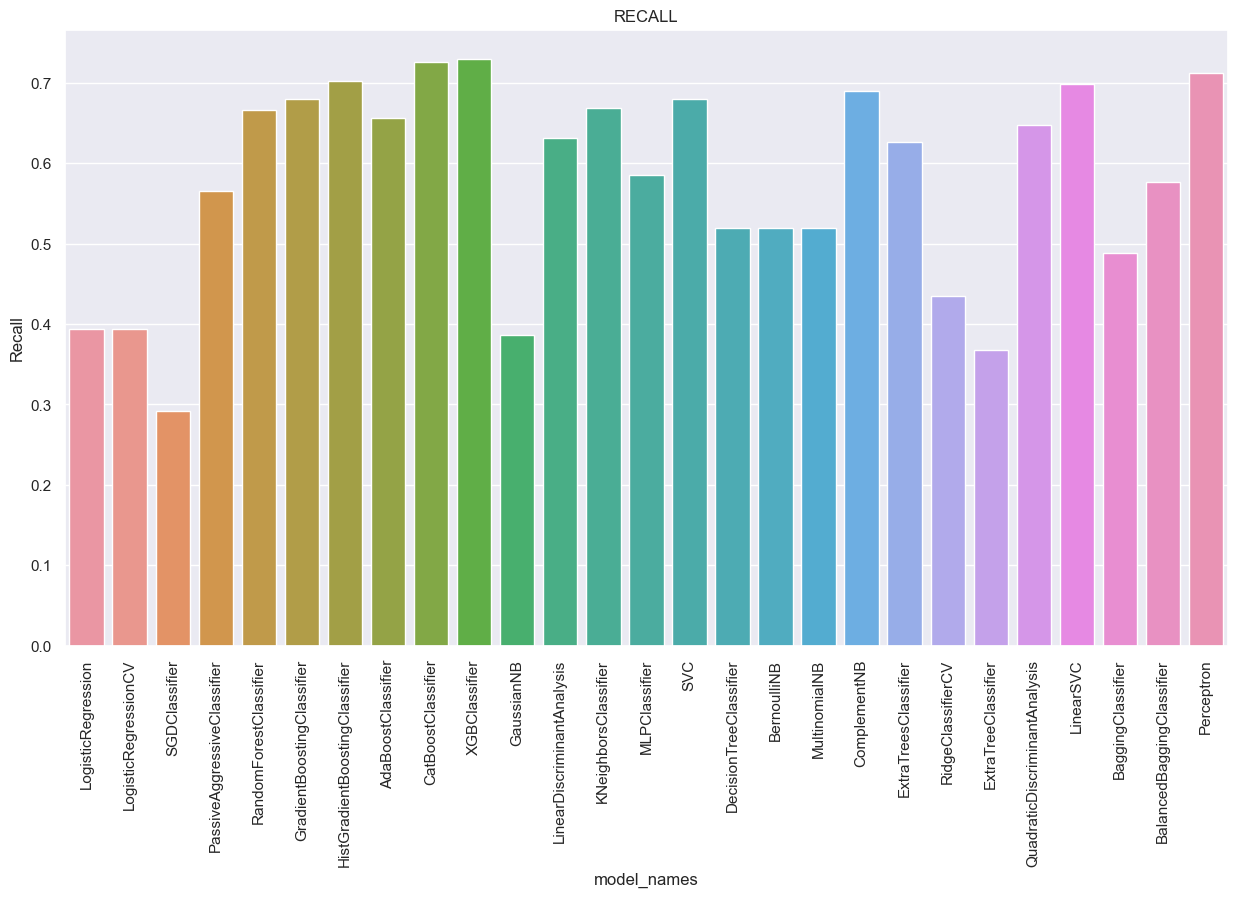

In [7]:
train.select_models = list(fit.index)
train.visualize(
    param=fit,
    y=labels,                
    t_split=True, 
    kf=False, 
    size=(15,8)
)
plt.show()